<a href="https://colab.research.google.com/github/SamaraMoreira/IA/blob/main/material/aulas/IA/lab07/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/IA/lab07/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aprendizagem de máquina

### Objetivos

  - Conhecer e Praticar os algoritmo multilayer Perceptron (MLP)
  - Conhecer uma intuição sobre função de ativação, backpropagation
  - Conhecer e praticar o framework TensorFlow
  

## Perceptron


Relembrando o neuronio artificial:
    

<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/IA/lab07/img18.gif?raw=1">

## Desafio1


Calcule a saida do perceptron abaixo:

<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/IA/lab07/perceptron.png?raw=1">

x0 = 2;
x1 = 0;
x2 = -1,24;
bias = 1;
w0 = 0;
w1 = 2;
w3 = 1;
função de ativação = Heaviside


### Resposta:

_________________________________


In [1]:
def heaviside(z):
    if z >= 0:
        return 1
    else:
        return 0

def perceptron_output(inputs, weights, bias):
    assert len(inputs) == len(weights), "Número de entradas e pesos devem ser iguais"

    # Calcula a entrada líquida
    z = sum(x * w for x, w in zip(inputs, weights)) + bias

    # Aplica a função de ativação Heaviside
    return heaviside(z)

# Entradas
x0 = 2
x1 = 0
x2 = -1.24

# Pesos
w0 = 0
w1 = 2
w2 = 1

# Viés
bias = 1

# Calcula a saída do perceptron
saida = perceptron_output([x0, x1, x2], [w0, w1, w2], bias)
print("Saída do perceptron:", saida)


Saída do perceptron: 0


### Implementação de uma rede perceptron

Vamos usar um framework de machine learnning chamado TensorFlow/keras para fazer esta implementação.

pip install tensorflow

In [3]:
import tensorflow as tf
from tensorflow import keras


In [4]:
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Dense(units=1, input_shape=[1])
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Layers

O arranjo de neuronios define a quantidade de camadas ou `layers` que a rede neural possui na rede perceptron possui apenas uma camada. Em uma rede MLP (multlayer perceptron) possui além das camadas de entrada e saída, camadas ocultas ou `hiden layers`, essas redes tambem são conhecidas por redes densas ou fully-connected.


<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/IA/lab07/perceptron1.png?raw=1">


## Funão de ativação

É basicamente uma função matematica que é responsavel por `ativar` ou mudar o comportamento de saída do neuronio.


Dentre as mais comuns temos:


<img src="https://miro.medium.com/v2/resize:fit:789/1*FxzVKINmFbbcMkkxnIqlYQ.jpeg">

Outras funções de ativação muito utilizadas são:

 - softplus
 - elu
 - sigmoid
 - tanh



### Desafio 2

Implemente a rede MLP abaixo usando TensorFlor/keras: função de ativação Relu

<img src="https://miro.medium.com/v2/resize:fit:789/1*FxzVKINmFbbcMkkxnIqlYQ.jpeg">


Dica: use o argumento `activation='relu'` em `layers.Dense`

In [5]:
## Sua resposta aqui...

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(1, activation='sigmoid')  # Camada de saída com 1 neurônio e ativação sigmoid (para problemas de classificação binária)
])

# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Visualizando a arquitetura do modelo
model.summary()






Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                704       
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 769 (3.00 KB)
Trainable params: 769 (3.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


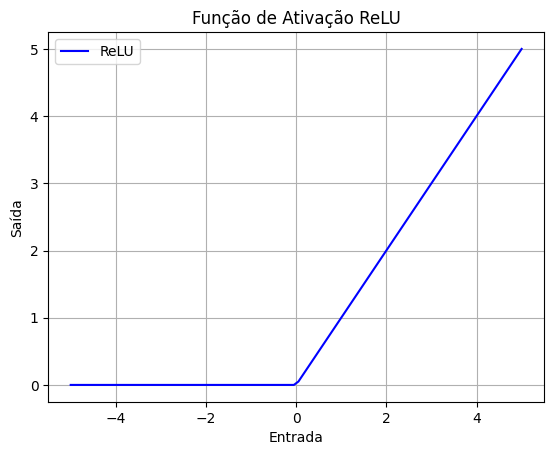

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Função de ativação ReLU
def relu(x):
    return np.maximum(0, x)

# Valores de entrada para o gráfico
x_values = np.linspace(-5, 5, 100)  # Gera 100 pontos no intervalo [-5, 5]

# Calcula os valores de saída da função de ativação ReLU para os valores de entrada
y_values = relu(x_values)

# Plotagem do gráfico
plt.plot(x_values, y_values, label='ReLU', color='blue')
plt.title('Função de Ativação ReLU')
plt.xlabel('Entrada')
plt.ylabel('Saída')
plt.grid(True)
plt.legend()
plt.show()


## Backpropagation

A técnica de backpropagation é fundamental para o treinamento de redes neurais, pois é através dela que os pesos são ajustados em função do erro calculado pela função de perda (Loss).


### Funções de Perda (Loss Functions)

- `Mean Squared Error (MSE)`: Utilizado em problemas de regressão. Calcula a média dos quadrados das diferenças entre os valores previstos e os valores reais.
- `Mean Absolute Error (MAE)`: Também utilizado em problemas de regressão. Calcula a média do valor absoluto das diferenças entre os valores previstos e os valores reais.
- `Binary Cross-Entropy (BCE)`: Utilizado em problemas de classificação binária. Mede a diferença entre duas distribuições de probabilidade, a prevista e a real.

### Otimizadores (Optimizers)

Os otimizadores são algoritmos que `ajustam os pesos da rede neural` com o objetivo de `minimizar a função de perda`. Alguns dos otimizadores mais comuns são:

- `Stochastic Gradient Descent (SGD)`: Um dos otimizadores mais simples e amplamente utilizados. Atualiza os pesos em pequenos passos, na direção oposta ao gradiente da função de perda.
- `RMSprop`: Adapta a taxa de aprendizado para cada parâmetro, dividindo a taxa de aprendizado por uma média móvel do quadrado dos gradientes.
- `Adam`: Combina as ideias do RMSprop e do SGD com momentum. Mantém uma média móvel tanto do gradiente quanto do quadrado do gradiente, e usa essas médias para adaptar a taxa de aprendizado para cada parâmetro.`(um dos mais utilizados)`
- `Adadelta`: Uma extensão do Adagrad que busca reduzir seu comportamento agressivo de diminuição da taxa de aprendizado.
- `Adagrad`: Adapta a taxa de aprendizado para cada parâmetro, escalando-os inversamente proporcionalmente à raiz quadrada da soma de todos os gradientes quadrados passados.
- `Adamax`: Uma variante do Adam baseada na norma infinita.

- Entre outros...

<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/IA/lab07/sgd.gif?raw=1">

![gradient descent](https://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization_files/ball.png)

![grad](https://media.giphy.com/media/jUvoKxaLa7kxG/giphy.gif)


<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/IA/lab07/loss.gif?raw=1">




In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mse')

### Pausa para carregar e preparar os dados para treinamento



In [9]:
!wget https://raw.githubusercontent.com/arnaldojr/disruptivearchitectures/master/material/aulas/IA/lab07/SalesData.csv /content


--2024-04-10 01:31:38--  https://raw.githubusercontent.com/arnaldojr/disruptivearchitectures/master/material/aulas/IA/lab07/SalesData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11884 (12K) [text/plain]
Saving to: ‘SalesData.csv’

SalesData.csv       100%[===================>]  11.61K  --.-KB/s    in 0s      

2024-04-10 01:31:38 (72.5 MB/s) - ‘SalesData.csv’ saved [11884/11884]

/content: Scheme missing.
FINISHED --2024-04-10 01:31:38--
Total wall clock time: 0.1s
Downloaded: 1 files, 12K in 0s (72.5 MB/s)


In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv('SalesData.csv')
df.info()

# Separa os dados em X e y
X_train = df['Temperature']
y_train = df['Revenue']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


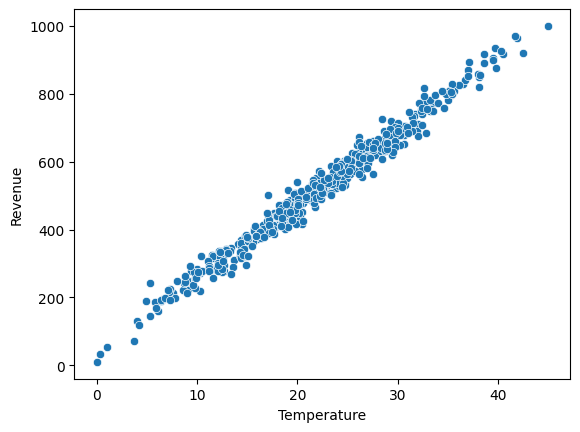

In [11]:
import seaborn as sns

sns.scatterplot(x=X_train, y=y_train);

In [12]:
### Tente fazer o treinamento, se der erro! faça o ajustes necessários na camada sequencial em layer.dense().



epochs_hist = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
16/16 [==============================] - 1s 2ms/step - loss: 294805.7500
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 282731.6562
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 266744.8125
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 242817.8750
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 207918.1406
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 159702.6406
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 107042.6797
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 56366.8555
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 20997.7637
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 4615.9893


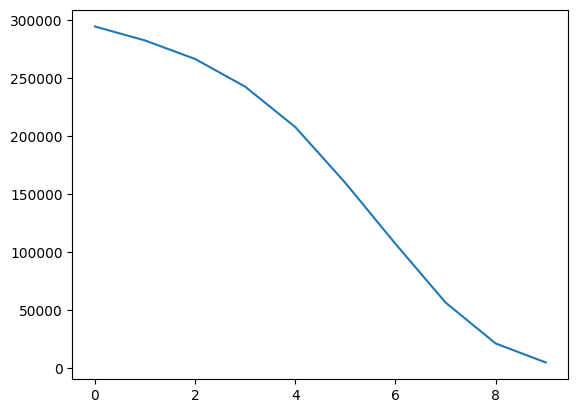

In [13]:
import pandas as pd

history_df = pd.DataFrame(epochs_hist.history)

history_df['loss'].plot();

In [14]:
# Previsões com o modelo treinado
temp = 5
receita = model.predict([temp])
print('Previsão de Receita Usando a ANN Treinada =', receita[0][0])

1/1 [==============================] - 0s 104ms/step
Previsão de Receita Usando a ANN Treinada = 122.619125


16/16 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Receita Gerada vs. Temperatura no Ponto de Venda de Sorvetes')

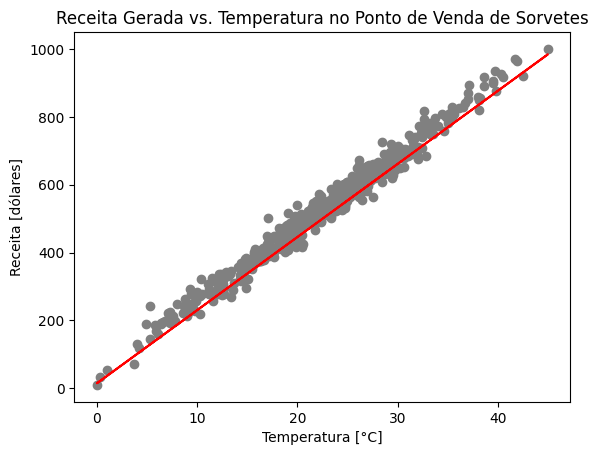

In [15]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.ylabel('Receita [dólares]')
plt.xlabel('Temperatura [°C]')
plt.title('Receita Gerada vs. Temperatura no Ponto de Venda de Sorvetes')

## desafio 3:

O treinamento para 10 épocas ficou bom??? se não, melhore o resultado.

Epoch 1/10
16/16 [==============================] - 1s 2ms/step - loss: 294641.8750
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 275959.2188
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 252817.6562
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 219405.2031
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 173995.3750
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 120489.2969
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 65975.7578
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 25418.6309
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 5095.6597
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 890.7135


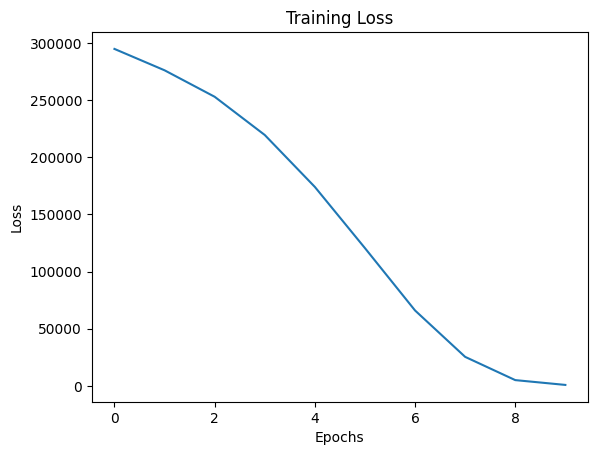

In [16]:
### seu código aqui.....

"""A perda loss ainda é muito alta após 10 épocas, com as alterações a seguir o no início do treinamento a perda era alta em torno de 294641.8750.
À medida que o treinamento progredia, a perda ia diminuindo, finalizando em 890.7135, """

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definindo o modelo com mais camadas e neurônios
model = Sequential([
    Dense(128, activation='relu', input_shape=(1,)),  # Camada oculta com 128 neurônios e ativação ReLU
    Dense(64, activation='relu'),  # Adicionando outra camada oculta com 64 neurônios e ativação ReLU
    Dense(1)  # Camada de saída com 1 neurônio
])

# Compilando o modelo com um otimizador Adam e taxa de aprendizado de 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Treinando o modelo
epochs_hist = model.fit(X_train, y_train, epochs=10)

# Visualizando a perda ao longo das épocas
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(epochs_hist.history)
plt.plot(history_df['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()



## Resumo do dia

Até o momento fizemos o seguinte:

- Carregar e Visualizar os Dados
- Criar e Compilar o Modelo
- Treinamento
- Avaliação e Predição

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


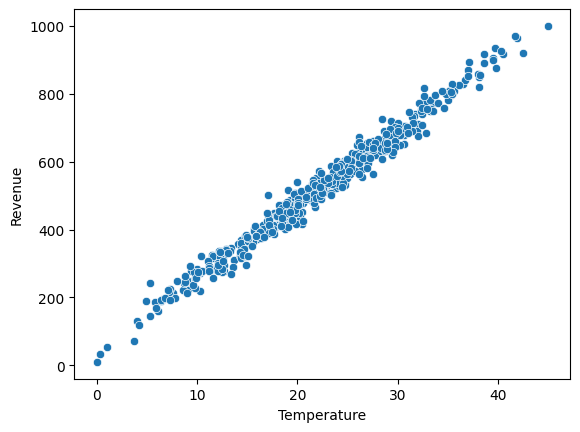

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 285449.0312
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 245574.0781
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 209935.3906
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 177783.7812
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 149763.7188
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 125482.2812
Epoch 7/100
16/16 [=======================

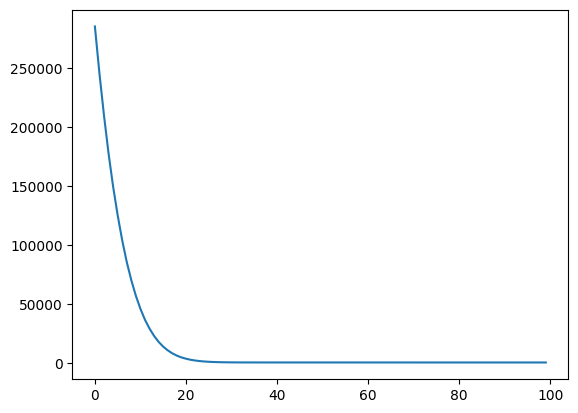

16/16 [==============================] - 0s 1ms/step


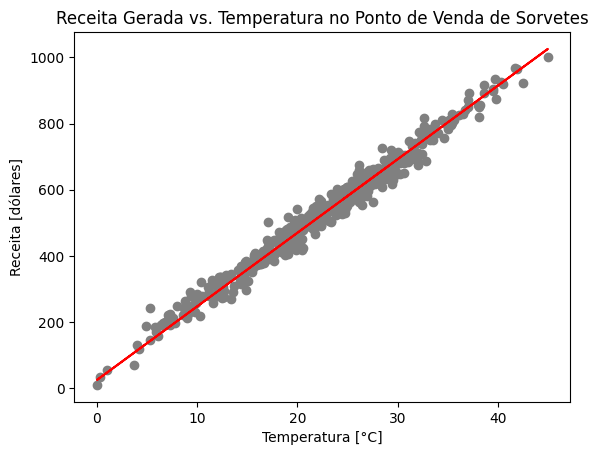

1/1 [==============================] - 0s 62ms/step
Previsão de Receita Usando a ANN Treinada = [[136.12532]]


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras

def carregar_e_visualizar_dados():
    # Carregar os dados
    #!wget https://raw.githubusercontent.com/arnaldojr/disruptivearchitectures/master/material/aulas/IA/lab07/SalesData.csv /content
    df = pd.read_csv('SalesData.csv')
    df.info()

    # Separar os dados
    X_train = df['Temperature']
    y_train = df['Revenue']

    # Visualizar os dados
    sns.scatterplot(x=X_train, y=y_train)
    plt.show()

    return X_train, y_train

def criar_e_compilar_modelo():
    # Criar o modelo
    model = keras.Sequential([
        layers.Dense(units=1, input_shape=[1])
    ])

    # Compilar o modelo
    model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mse')
    model.summary()

    return model

def treinar_modelo(model, X_train, y_train, epochs=100):
    historico_epochs = model.fit(X_train, y_train, epochs=epochs)
    df_historico = pd.DataFrame(historico_epochs.history)
    df_historico['loss'].plot()
    plt.show()
    return model

def avaliar_e_prever(model, X_train, y_train):
    # Visualizar as predições do modelo
    plt.scatter(X_train, y_train, color='gray')
    plt.plot(X_train, model.predict(X_train), color='red')
    plt.ylabel('Receita [dólares]')
    plt.xlabel('Temperatura [°C]')
    plt.title('Receita Gerada vs. Temperatura no Ponto de Venda de Sorvetes')
    plt.show()

    # Fazer uma previsão
    temp = 5
    receita = model.predict([temp])
    print('Previsão de Receita Usando a ANN Treinada =', receita)

# ---- Programa principal ----

# Carregar e visualizar os dados
X_train, y_train = carregar_e_visualizar_dados()

# Criar e compilar o modelo
model = criar_e_compilar_modelo()

# Treinar o modelo
model = treinar_modelo(model, X_train, y_train)

# Avaliar e fazer predições
avaliar_e_prever(model, X_train, y_train)



### Desafio 4: Implementação end-to-end MLP

Realize o treinamento de uma rede MLP para o dataset Fashion MNIST. Um guia passo a passo pode ser encontrado no link https://www.tensorflow.org/tutorials/keras/classification.

In [ ]:
### Seu código aqui.....

In [18]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

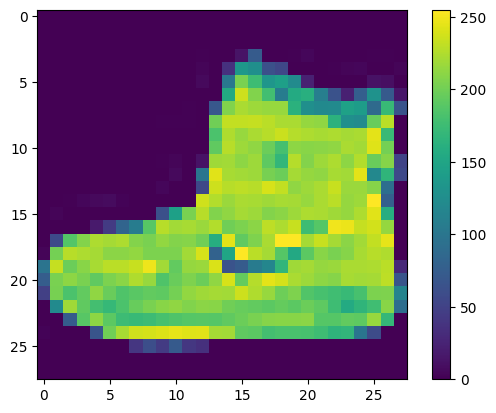

In [20]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
train_images = train_images / 255.0

test_images = test_images / 255.0

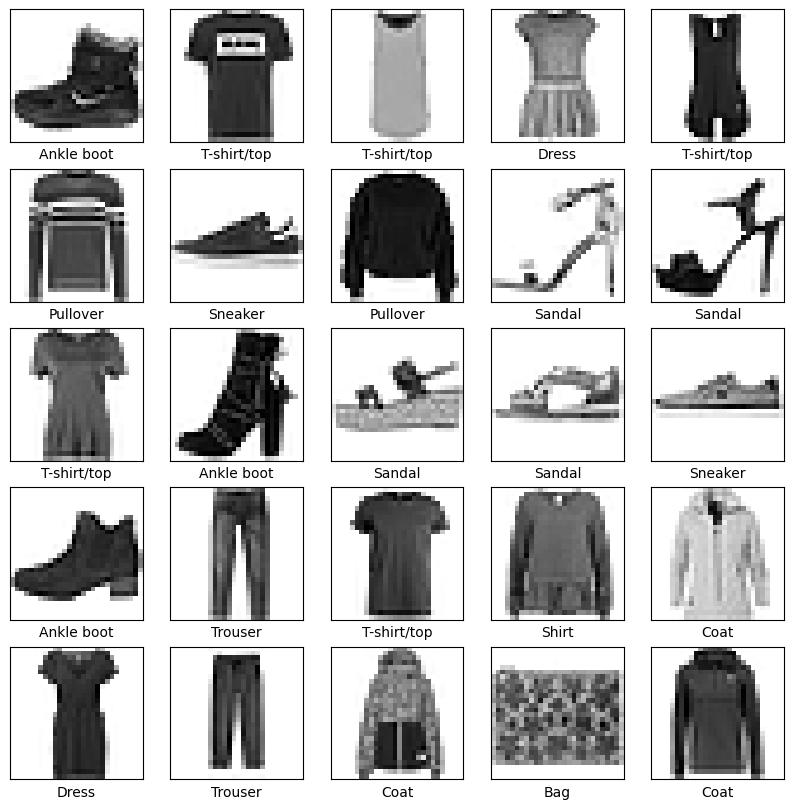

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.4991 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3722 - accuracy: 0.8659
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3348 - accuracy: 0.8788
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3129 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2938 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2783 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2678 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2556 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2468 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.23

In [26]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3520 - accuracy: 0.8762 - 672ms/epoch - 2ms/step

Test accuracy: 0.8762000203132629


In [28]:
predictions = model.predict(test_images)

313/313 [==============================] - 2s 6ms/step


In [29]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

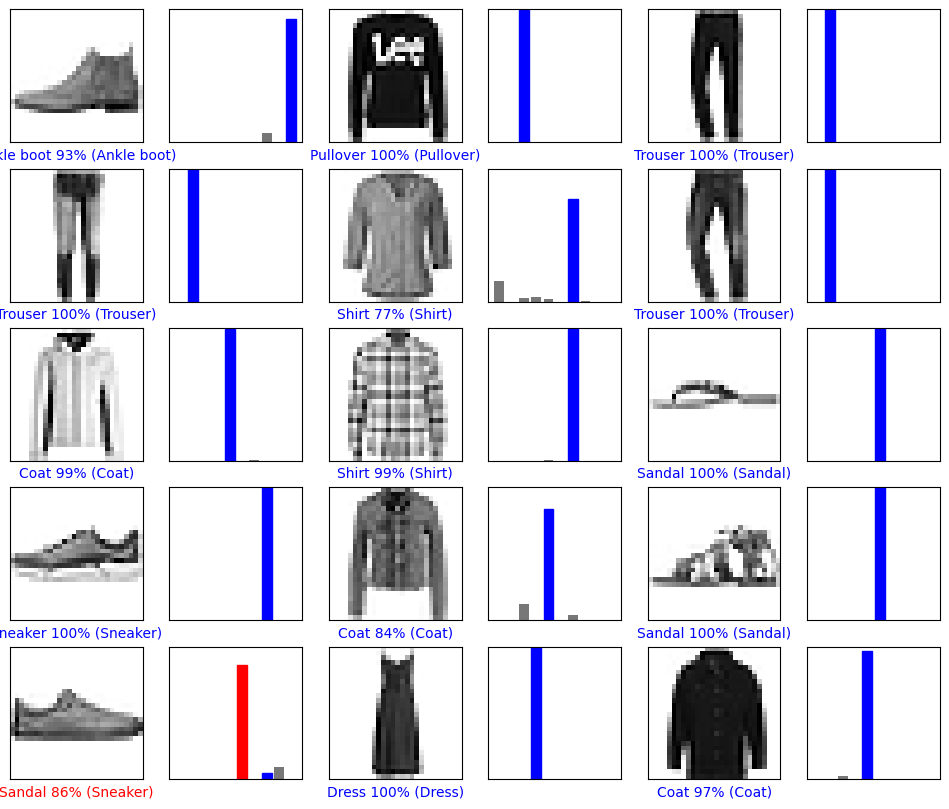

In [30]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()